In [8]:
# Import library
import pandas as pd
import numpy as np

# Module for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To avoid unnecessary warning messages.
import warnings
warnings.filterwarnings('ignore')


# Built-in datasets
from sklearn.datasets import load_breast_cancer

# Create standardized data
from sklearn.preprocessing import StandardScaler

# Module for logistic regression model
from sklearn.linear_model import LogisticRegression

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

sns.set(style='white', context='notebook', palette='deep')

# Amsterdam

In [42]:
df1 = pd.read_csv('Amsterdam.csv')

In [43]:
df1.head()

,ID,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,1,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,2,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,3,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,4,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,5,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2080 non-null   int64  
 1   City                         2080 non-null   object 
 2   Price                        2080 non-null   float64
 3   Day                          2080 non-null   object 
 4   Room Type                    2080 non-null   object 
 5   Shared Room                  2080 non-null   bool   
 6   Private Room                 2080 non-null   bool   
 7   Person Capacity              2080 non-null   int64  
 8   Superhost                    2080 non-null   bool   
 9   Multiple Rooms               2080 non-null   int64  
 10  Business                     2080 non-null   int64  
 11  Cleanliness Rating           2080 non-null   int64  
 12  Guest Satisfaction           2080 non-null   int64  
 13  Bedrooms          

In [45]:
#Remove unnecessary columns
df1 = df1.drop('ID', axis=1)
df1 = df1.drop('City', axis=1)
df1 = df1.drop('Shared Room', axis=1)
df1 = df1.drop('Private Room', axis=1)
df1 = df1.drop('Multiple Rooms', axis=1)
df1 = df1.drop('Business', axis=1)
df1 = df1.drop('Attraction Index', axis=1)
df1 = df1.drop('Restraunt Index', axis=1)

In [46]:
#Convert to dummy data  
df1 = pd.get_dummies(df1, drop_first=True)
df1.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,194.033698,2,False,10,93,1,5.022964,2.539380,4.166708,6.846473,0,1,0
1,344.245776,4,False,8,85,1,0.488389,0.239404,33.421209,58.342928,0,1,0
2,264.101422,2,False,9,87,1,5.748312,3.651621,3.985908,6.646700,0,1,0
3,433.529398,4,False,9,90,2,0.384862,0.439876,26.119108,60.973565,0,1,0
4,485.552926,2,True,10,98,1,0.544738,0.318693,29.272733,56.811677,0,1,0


In [47]:
# Removed a price data which is above $5000
df1 = df1[df1["Price"]<5000]

In [48]:
#Independent variables
x1 = df1[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

In [49]:
#Dependent variable
y1 = df1['Price']

In [50]:
#Normalize all columns.

In [51]:
#Module
from sklearn.preprocessing import MinMaxScaler
#Instance
minmax_sc = MinMaxScaler()

In [52]:
#Calculation and data conversion
x1['Person Capacity'] = minmax_sc.fit_transform(x1[['Person Capacity']])
x1['Cleanliness Rating'] = minmax_sc.fit_transform(x1[['Cleanliness Rating']])
x1['Guest Satisfaction'] = minmax_sc.fit_transform(x1[['Guest Satisfaction']])
x1['Bedrooms'] = minmax_sc.fit_transform(x1[['Bedrooms']])
x1['City Center (km)'] = minmax_sc.fit_transform(x1[['City Center (km)']])
x1['Metro Distance (km)'] = minmax_sc.fit_transform(x1[['Metro Distance (km)']])
x1['Normalised Attraction Index'] = minmax_sc.fit_transform(x1[['Normalised Attraction Index']])
x1['Normalised Restraunt Index'] = minmax_sc.fit_transform(x1[['Normalised Restraunt Index']])

In [53]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [54]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x1_train,y1_train)

LinearRegression()

In [55]:
predictions1 = model1.predict(x1_test)
predictions1

array([ 448.28944027,  992.23340508,  304.6005238 ,  140.98972912,
        610.57977006,  977.38230073,  335.87928652,  793.34137348,
        491.20672846,  335.13164332,  362.15128538,  947.40349084,
        322.07105271,  789.09386432,  425.60754986,  502.54300108,
        122.55312247,  443.68640194,  825.98487116,  709.93719743,
        327.81816376,  428.55647152,  461.59913766,  909.26363946,
        241.80941499,  497.56328546,  426.0544126 ,  543.42929912,
        616.35210596,  736.03489386,  947.97812977,  342.87712553,
        300.68924984,  870.01481275,  964.20016007,  293.64898937,
         66.31247275,  875.79572131,  471.91171306,  331.96869025,
        393.77968459,  444.19748805,  331.28038162,  173.88844895,
        822.26642989,  963.77628054,  208.78761777,  542.88617039,
        161.26634561,  718.82213456,  465.62012292,  508.32588512,
        322.11122972,  844.95670831,  163.69265459,  576.79090393,
        707.80348142,  812.10257317,  568.63982823,  552.41345

<AxesSubplot:xlabel='Price'>

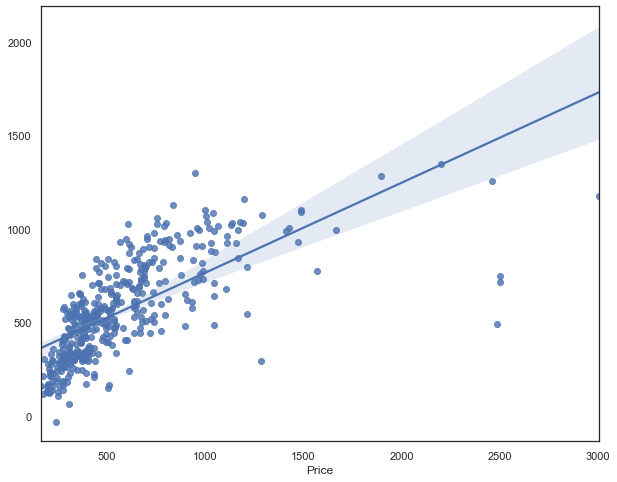

In [56]:
plt.figure(figsize=(10,8))
sns.regplot(y1_test,predictions1)

In [57]:
coeff_parameter1 = pd.DataFrame(model1.coef_,x1.columns,columns=['Coefficient'])
coeff_parameter1

,Coefficient
Day_Weekend,18.199841
Room Type_Private room,-174.366883
Room Type_Shared room,-270.073827
Person Capacity,372.254867
Cleanliness Rating,46.394563
Guest Satisfaction,144.451635
Bedrooms,755.570346
City Center (km),-184.397381
Metro Distance (km),-62.783752
Normalised Attraction Index,467.353439


In [58]:
# print the intercept
print(model1.intercept_)

147.15654300096003


In [59]:
import statsmodels.api as sm
x1_train_Sm= sm.add_constant(x1_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y1_train,x1_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          8.34e-283
Time:                        14:12:00   Log-Likelihood:                -11477.
No. Observations:                1662   AIC:                         2.298e+04
Df Residuals:                    1650   BIC:                         2.304e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Athens

In [60]:
df2 = pd.read_csv('Athens.csv')

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5280 non-null   int64  
 1   City                         5280 non-null   object 
 2   Price                        5280 non-null   float64
 3   Day                          5280 non-null   object 
 4   Room Type                    5280 non-null   object 
 5   Shared Room                  5280 non-null   bool   
 6   Private Room                 5280 non-null   bool   
 7   Person Capacity              5280 non-null   int64  
 8   Superhost                    5280 non-null   bool   
 9   Multiple Rooms               5280 non-null   int64  
 10  Business                     5280 non-null   int64  
 11  Cleanliness Rating           5280 non-null   int64  
 12  Guest Satisfaction           5280 non-null   int64  
 13  Bedrooms          

In [63]:
#Remove unnecessary columns
df2 = df2.drop('ID', axis=1)
df2 = df2.drop('City', axis=1)
df2 = df2.drop('Shared Room', axis=1)
df2 = df2.drop('Private Room', axis=1)
df2 = df2.drop('Multiple Rooms', axis=1)
df2 = df2.drop('Business', axis=1)
df2 = df2.drop('Attraction Index', axis=1)
df2 = df2.drop('Restraunt Index', axis=1)

In [64]:
#Convert to dummy data  
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,129.824479,4,False,10,100,2,2.813964,0.881890,2.086871,5.915160,0,0,0
1,138.963748,4,True,10,96,1,0.407293,0.304568,9.060559,30.572629,0,0,0
2,156.304924,3,True,10,98,1,1.237211,0.288488,7.522257,29.731642,0,0,0
3,91.627024,4,True,10,99,1,4.367457,0.297467,1.500740,4.408047,0,0,0
4,74.051508,2,False,10,100,1,2.194185,0.385266,2.968577,8.509204,0,1,0


In [65]:
# Removed a price data which is above $5000
df2 = df2[df2["Price"]<5000]

In [66]:
#Independent variables
x2 = df2[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y2 = df2['Price']

In [67]:
#Calculation and data conversion
x2['Person Capacity'] = minmax_sc.fit_transform(x2[['Person Capacity']])
x2['Cleanliness Rating'] = minmax_sc.fit_transform(x2[['Cleanliness Rating']])
x2['Guest Satisfaction'] = minmax_sc.fit_transform(x2[['Guest Satisfaction']])
x2['Bedrooms'] = minmax_sc.fit_transform(x2[['Bedrooms']])
x2['City Center (km)'] = minmax_sc.fit_transform(x2[['City Center (km)']])
x2['Metro Distance (km)'] = minmax_sc.fit_transform(x2[['Metro Distance (km)']])
x2['Normalised Attraction Index'] = minmax_sc.fit_transform(x2[['Normalised Attraction Index']])
x2['Normalised Restraunt Index'] = minmax_sc.fit_transform(x2[['Normalised Restraunt Index']])

In [68]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [69]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x2_train,y2_train)

LinearRegression()

In [70]:
predictions2 = model2.predict(x2_test)
predictions2

array([117.12076801, 138.09139153, 112.12577258, ..., 215.74136165,
       169.12557215,  76.85600351])

<AxesSubplot:xlabel='Price'>

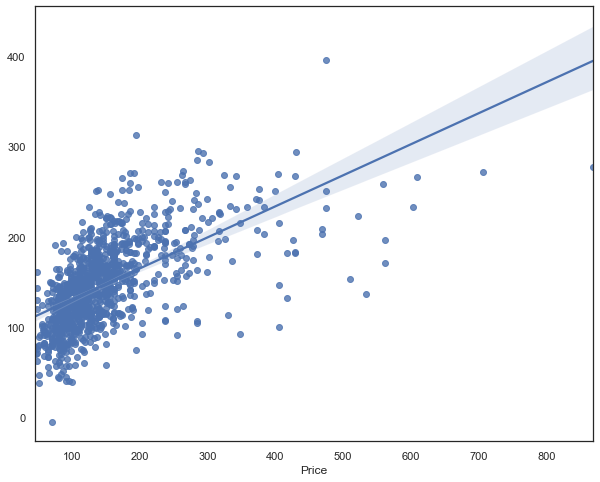

In [71]:
plt.figure(figsize=(10,8))
sns.regplot(y2_test,predictions2)

In [72]:
coeff_parameter2 = pd.DataFrame(model2.coef_,x2.columns,columns=['Coefficient'])
coeff_parameter2

,Coefficient
Day_Weekend,21.785121
Room Type_Private room,-14.344939
Room Type_Shared room,-61.230410
Person Capacity,51.256897
Cleanliness Rating,61.981002
Guest Satisfaction,5.311350
Bedrooms,84.893128
City Center (km),-64.938000
Metro Distance (km),-31.997766
Normalised Attraction Index,348.075107


In [74]:
# print the intercept
print(model2.intercept_)

18.864103444273212


In [73]:
import statsmodels.api as sm
x2_train_Sm= sm.add_constant(x2_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y2_train,x2_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:59:02   Log-Likelihood:                -23638.
No. Observations:                4223   AIC:                         4.730e+04
Df Residuals:                    4211   BIC:                         4.738e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Barcelona

In [77]:
df3 = pd.read_csv('Barcelona.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2833 non-null   int64  
 1   City                         2833 non-null   object 
 2   Price                        2833 non-null   float64
 3   Day                          2833 non-null   object 
 4   Room Type                    2833 non-null   object 
 5   Shared Room                  2833 non-null   bool   
 6   Private Room                 2833 non-null   bool   
 7   Person Capacity              2833 non-null   int64  
 8   Superhost                    2833 non-null   bool   
 9   Multiple Rooms               2833 non-null   int64  
 10  Business                     2833 non-null   int64  
 11  Cleanliness Rating           2833 non-null   int64  
 12  Guest Satisfaction           2833 non-null   int64  
 13  Bedrooms          

In [79]:
#Remove unnecessary columns
df3 = df3.drop('ID', axis=1)
df3 = df3.drop('City', axis=1)
df3 = df3.drop('Shared Room', axis=1)
df3 = df3.drop('Private Room', axis=1)
df3 = df3.drop('Multiple Rooms', axis=1)
df3 = df3.drop('Business', axis=1)
df3 = df3.drop('Attraction Index', axis=1)
df3 = df3.drop('Restraunt Index', axis=1)

In [80]:
#Convert to dummy data  
df3 = pd.get_dummies(df3, drop_first=True)
df3.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,474.317499,4,False,10,91,1,1.111996,0.630491,17.942927,20.154890,0,0,0
1,169.897829,2,True,10,88,1,1.751839,0.124017,10.910462,17.484489,0,1,0
2,161.984779,4,False,9,88,1,1.670493,0.080322,11.726595,18.505814,0,1,0
3,367.956804,3,False,10,91,1,1.475847,0.093107,13.634603,20.837357,0,0,0
4,196.895292,3,False,9,91,1,1.855452,0.272486,11.793678,17.440874,0,1,0


In [81]:
# Removed a price data which is above $5000
df3 = df3[df3["Price"]<5000]

In [82]:
#Independent variables
x3 = df3[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y3 = df3['Price']

In [83]:
#Calculation and data conversion
x3['Person Capacity'] = minmax_sc.fit_transform(x3[['Person Capacity']])
x3['Cleanliness Rating'] = minmax_sc.fit_transform(x3[['Cleanliness Rating']])
x3['Guest Satisfaction'] = minmax_sc.fit_transform(x3[['Guest Satisfaction']])
x3['Bedrooms'] = minmax_sc.fit_transform(x3[['Bedrooms']])
x3['City Center (km)'] = minmax_sc.fit_transform(x3[['City Center (km)']])
x3['Metro Distance (km)'] = minmax_sc.fit_transform(x3[['Metro Distance (km)']])
x3['Normalised Attraction Index'] = minmax_sc.fit_transform(x3[['Normalised Attraction Index']])
x3['Normalised Restraunt Index'] = minmax_sc.fit_transform(x3[['Normalised Restraunt Index']])

In [84]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 0)

In [85]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(x3_train,y3_train)

LinearRegression()

In [86]:
predictions3 = model3.predict(x3_test)
predictions3

array([206.72930895, 161.89567926, 277.47275812, 226.41831037,
       173.7565291 , 203.77380726, 184.5570903 ,  58.32024928,
       209.37937048, 222.06133634, 177.30445126, 249.39092921,
       147.03579144, 210.29374764, 229.75832862, 202.97461762,
       447.25873999, 390.50910948, 139.668567  , 173.08698981,
       226.04508329, 263.35370564, 147.60967834, 195.56164727,
       146.55549021, 245.98221878, 548.65021862, 192.44081229,
       234.7569835 , 173.73763014, 220.78013761, 233.80188287,
       158.58308046, 233.20075445, 219.62372386, 241.77603698,
       192.61559213, 242.53004638, 226.20852015, 588.56893127,
       164.08479334, 215.90204727, 815.71629417, 153.4345894 ,
       622.83670073, 289.18230604, 209.69374303, 589.04773633,
       199.93277228, 385.84316008, 621.83760557, 483.87293489,
       281.82715069, 254.13773697, 140.72730309, 212.26165871,
       108.0079315 , 377.28756927, 183.50436494, 179.70180199,
       313.27188517, 603.82656983, 268.26635761, 425.04

<AxesSubplot:xlabel='Price'>

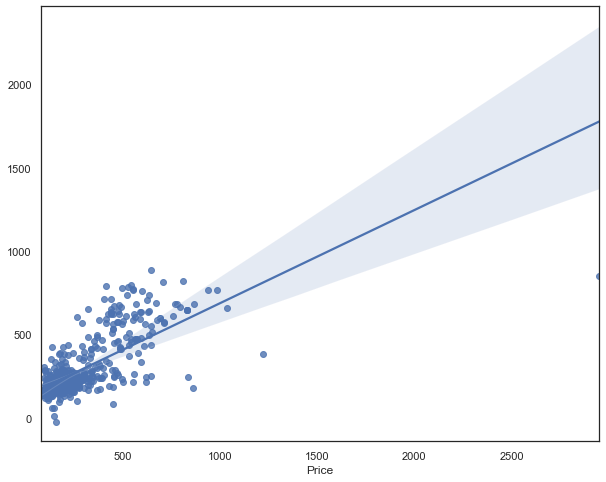

In [87]:
plt.figure(figsize=(10,8))
sns.regplot(y3_test,predictions3)

In [88]:
coeff_parameter3 = pd.DataFrame(model3.coef_,x3.columns,columns=['Coefficient'])
coeff_parameter3

,Coefficient
Day_Weekend,45.412881
Room Type_Private room,-196.710124
Room Type_Shared room,-267.834124
Person Capacity,140.882032
Cleanliness Rating,119.630788
Guest Satisfaction,-6.272648
Bedrooms,801.227483
City Center (km),25.461571
Metro Distance (km),43.769939
Normalised Attraction Index,68.830912


In [89]:
# print the intercept
print(model3.intercept_)

83.20196516592654


In [90]:
import statsmodels.api as sm
x3_train_Sm= sm.add_constant(x3_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y3_train,x3_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     201.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:21:59   Log-Likelihood:                -14758.
No. Observations:                2262   AIC:                         2.954e+04
Df Residuals:                    2250   BIC:                         2.961e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Berlin

In [91]:
df4 = pd.read_csv('Berlin.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2484 non-null   int64  
 1   City                         2484 non-null   object 
 2   Price                        2484 non-null   float64
 3   Day                          2484 non-null   object 
 4   Room Type                    2484 non-null   object 
 5   Shared Room                  2484 non-null   bool   
 6   Private Room                 2484 non-null   bool   
 7   Person Capacity              2484 non-null   int64  
 8   Superhost                    2484 non-null   bool   
 9   Multiple Rooms               2484 non-null   int64  
 10  Business                     2484 non-null   int64  
 11  Cleanliness Rating           2484 non-null   int64  
 12  Guest Satisfaction           2484 non-null   int64  
 13  Bedrooms          

In [92]:
#Remove unnecessary columns
df4 = df4.drop('ID', axis=1)
df4 = df4.drop('City', axis=1)
df4 = df4.drop('Shared Room', axis=1)
df4 = df4.drop('Private Room', axis=1)
df4 = df4.drop('Multiple Rooms', axis=1)
df4 = df4.drop('Business', axis=1)
df4 = df4.drop('Attraction Index', axis=1)
df4 = df4.drop('Restraunt Index', axis=1)

In [93]:
#Convert to dummy data  
df4 = pd.get_dummies(df4, drop_first=True)
df4.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,185.799757,2,True,10,98,1,3.582211,0.174706,16.019042,30.710638,0,1,0
1,194.914462,5,False,9,86,1,3.525410,0.511922,11.487002,21.947685,0,1,0
2,176.217631,2,False,9,91,1,3.801713,0.281397,11.232324,21.741048,0,1,0
3,207.768533,3,True,10,97,1,0.982408,0.705573,20.307057,40.874362,0,1,0
4,150.743199,2,False,10,99,1,8.869697,2.187188,6.077469,10.515090,0,1,0


In [94]:
# Removed a price data which is above $5000
df4 = df4[df4["Price"]<5000]

In [95]:
#Independent variables
x4 = df4[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y4 = df4['Price']

In [96]:
#Calculation and data conversion
x4['Person Capacity'] = minmax_sc.fit_transform(x4[['Person Capacity']])
x4['Cleanliness Rating'] = minmax_sc.fit_transform(x4[['Cleanliness Rating']])
x4['Guest Satisfaction'] = minmax_sc.fit_transform(x4[['Guest Satisfaction']])
x4['Bedrooms'] = minmax_sc.fit_transform(x4[['Bedrooms']])
x4['City Center (km)'] = minmax_sc.fit_transform(x4[['City Center (km)']])
x4['Metro Distance (km)'] = minmax_sc.fit_transform(x4[['Metro Distance (km)']])
x4['Normalised Attraction Index'] = minmax_sc.fit_transform(x4[['Normalised Attraction Index']])
x4['Normalised Restraunt Index'] = minmax_sc.fit_transform(x4[['Normalised Restraunt Index']])

In [97]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.2, random_state = 0)

In [98]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(x4_train,y4_train)

LinearRegression()

In [99]:
predictions4 = model4.predict(x4_test)
predictions4

array([287.17812491, 179.61135122, 342.80167159, 249.78589161,
       224.55966815, 209.15884517, 231.6365883 , 207.16718788,
       121.96446064, 348.23369537, 359.30666926, 364.3323751 ,
       319.43442103, 366.2119856 , 343.17181414, 179.42891828,
       202.78911155, 269.28847306, 212.6388755 , 408.80535706,
       160.00812813, 149.00058633, 150.96485489, 232.5313639 ,
       152.92886115, 180.27150378, 148.04481016, 196.56894204,
       375.48474722, 153.79076105, 149.36256323, 325.63362838,
       365.36803024, 262.14362451, 586.32729738, 113.6082595 ,
       183.33222641, 160.9594582 , 265.92939895, 292.48711161,
       162.4786966 , 158.7441114 , 254.80145484, 206.87167166,
       209.76415159, 486.77403888, 371.67181122, 363.62905165,
       416.21328322, 139.49539834, 208.97704972, 167.69930736,
       217.8848971 , 168.19159409, 145.53385325, 394.07971533,
       216.51403893, 236.5144696 , 196.95141232, 163.68597896,
       389.3136066 , 195.21579176, 142.56965728, 179.70

<AxesSubplot:xlabel='Price'>

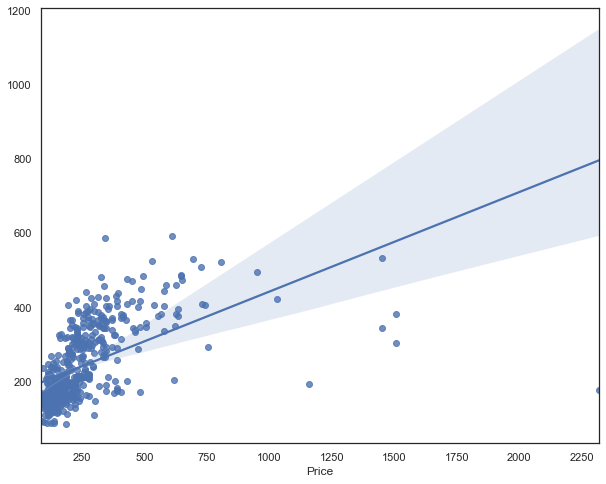

In [100]:
plt.figure(figsize=(10,8))
sns.regplot(y4_test,predictions4)

In [101]:
coeff_parameter4 = pd.DataFrame(model4.coef_,x4.columns,columns=['Coefficient'])
coeff_parameter4

,Coefficient
Day_Weekend,13.384121
Room Type_Private room,-123.854909
Room Type_Shared room,-195.685056
Person Capacity,113.478637
Cleanliness Rating,88.991709
Guest Satisfaction,-34.531558
Bedrooms,336.014551
City Center (km),10.326197
Metro Distance (km),-85.284292
Normalised Attraction Index,153.965476


In [102]:
# print the intercept
print(model4.intercept_)

150.67273651108366


In [103]:
import statsmodels.api as sm
x4_train_Sm= sm.add_constant(x4_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y4_train,x4_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.05e-182
Time:                        15:29:39   Log-Likelihood:                -12502.
No. Observations:                1985   AIC:                         2.503e+04
Df Residuals:                    1973   BIC:                         2.509e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#  Budapest

In [183]:
df5 = pd.read_csv('Budapest.csv')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4022 non-null   int64  
 1   City                         4022 non-null   object 
 2   Price                        4022 non-null   float64
 3   Day                          4022 non-null   object 
 4   Room Type                    4022 non-null   object 
 5   Shared Room                  4022 non-null   bool   
 6   Private Room                 4022 non-null   bool   
 7   Person Capacity              4022 non-null   int64  
 8   Superhost                    4022 non-null   bool   
 9   Multiple Rooms               4022 non-null   int64  
 10  Business                     4022 non-null   int64  
 11  Cleanliness Rating           4022 non-null   int64  
 12  Guest Satisfaction           4022 non-null   int64  
 13  Bedrooms          

In [184]:
#Remove unnecessary columns
df5 = df5.drop('ID', axis=1)
df5 = df5.drop('City', axis=1)
df5 = df5.drop('Shared Room', axis=1)
df5 = df5.drop('Private Room', axis=1)
df5 = df5.drop('Multiple Rooms', axis=1)
df5 = df5.drop('Business', axis=1)
df5 = df5.drop('Attraction Index', axis=1)
df5 = df5.drop('Restraunt Index', axis=1)

In [185]:
#Convert to dummy data  
df5 = pd.get_dummies(df5, drop_first=True)
df5.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,238.990459,6,True,10,99,1,0.359355,0.352643,24.116552,67.656853,0,0,0
1,300.794285,6,False,9,98,2,0.929427,0.200235,100.000000,34.267700,0,0,0
2,162.381915,4,True,10,98,1,2.450840,0.279452,9.755551,14.538245,0,0,0
3,118.437750,2,False,9,92,1,1.559449,0.477971,11.433155,24.702048,0,0,0
4,134.417446,4,True,10,99,2,1.113803,0.270102,11.843658,48.123218,0,0,0


In [186]:
# Removed a price data which is above $5000
df5 = df5[df5["Price"]<5000]

In [187]:
#Independent variables
x5 = df5[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y5 = df5['Price']

In [188]:
#Calculation and data conversion
x5['Person Capacity'] = minmax_sc.fit_transform(x5[['Person Capacity']])
x5['Cleanliness Rating'] = minmax_sc.fit_transform(x5[['Cleanliness Rating']])
x5['Guest Satisfaction'] = minmax_sc.fit_transform(x5[['Guest Satisfaction']])
x5['Bedrooms'] = minmax_sc.fit_transform(x5[['Bedrooms']])
x5['City Center (km)'] = minmax_sc.fit_transform(x5[['City Center (km)']])
x5['Metro Distance (km)'] = minmax_sc.fit_transform(x5[['Metro Distance (km)']])
x5['Normalised Attraction Index'] = minmax_sc.fit_transform(x5[['Normalised Attraction Index']])
x5['Normalised Restraunt Index'] = minmax_sc.fit_transform(x5[['Normalised Restraunt Index']])

In [189]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.2, random_state = 0)

In [190]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()
model5.fit(x5_train,y5_train)

LinearRegression()

In [191]:
predictions5 = model5.predict(x5_test)
predictions5

array([202.63611365, 118.43308498, 146.15360256, 184.34099289,
       198.88555525, 168.33919616, 155.60073418, 163.70108776,
       188.02597126, 217.7826016 , 196.65767255, 116.51220746,
       106.58707022, 185.10790877,  91.14350849, 243.5305552 ,
       152.73745436, 131.45655575, 254.37698427, 238.8470951 ,
       178.28444379, 126.21340396, 145.55347464, 210.61952062,
       135.59723698, 180.14327433, 224.0851725 , 244.29685203,
       169.35397828, 159.42861693, 112.66742428, 180.83636217,
       119.01666174, 165.4189937 , 172.46582102, 181.49928749,
       233.61476905, 152.33957167, 184.16812978, 228.22849252,
       152.89750186, 156.67985058, 217.5247298 , 153.51179059,
       132.62156003, 165.21859002, 163.02681883, 119.22511541,
       175.100915  , 169.6896177 , 178.57426555, 169.3011582 ,
       168.0342283 , 145.79270407, 124.03892232, 193.9078441 ,
       249.65353513, 160.01666693, 167.97755522, 171.49183786,
       172.84543981, 189.48475862, 111.82812955, 220.08

<AxesSubplot:xlabel='Price'>

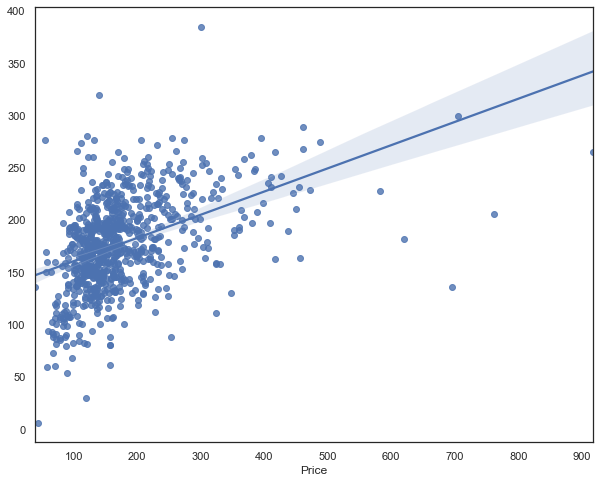

In [192]:
plt.figure(figsize=(10,8))
sns.regplot(y5_test,predictions5)

In [193]:
coeff_parameter5 = pd.DataFrame(model5.coef_,x5.columns,columns=['Coefficient'])
coeff_parameter5

,Coefficient
Day_Weekend,18.731666
Room Type_Private room,-56.505721
Room Type_Shared room,-37.050133
Person Capacity,50.526842
Cleanliness Rating,49.920468
Guest Satisfaction,-87.610684
Bedrooms,88.346734
City Center (km),145.391075
Metro Distance (km),-169.209927
Normalised Attraction Index,183.918205


In [194]:
# print the intercept
print(model5.intercept_)

122.31265556550422


In [195]:
import statsmodels.api as sm
x5_train_Sm= sm.add_constant(x5_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y5_train,x5_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     28.80
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.53e-58
Time:                        19:44:03   Log-Likelihood:                -20310.
No. Observations:                3217   AIC:                         4.064e+04
Df Residuals:                    3205   BIC:                         4.072e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Lisbon

In [118]:
df6 = pd.read_csv('Lisbon.csv')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5763 non-null   int64  
 1   City                         5763 non-null   object 
 2   Price                        5763 non-null   float64
 3   Day                          5763 non-null   object 
 4   Room Type                    5763 non-null   object 
 5   Shared Room                  5763 non-null   bool   
 6   Private Room                 5763 non-null   bool   
 7   Person Capacity              5763 non-null   int64  
 8   Superhost                    5763 non-null   bool   
 9   Multiple Rooms               5763 non-null   int64  
 10  Business                     5763 non-null   int64  
 11  Cleanliness Rating           5763 non-null   int64  
 12  Guest Satisfaction           5763 non-null   int64  
 13  Bedrooms          

In [119]:
#Remove unnecessary columns
df6 = df6.drop('ID', axis=1)
df6 = df6.drop('City', axis=1)
df6 = df6.drop('Shared Room', axis=1)
df6 = df6.drop('Private Room', axis=1)
df6 = df6.drop('Multiple Rooms', axis=1)
df6 = df6.drop('Business', axis=1)
df6 = df6.drop('Attraction Index', axis=1)
df6 = df6.drop('Restraunt Index', axis=1)

In [120]:
#Convert to dummy data  
df6 = pd.get_dummies(df6, drop_first=True)
df6.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,138.133208,2,True,10,98,1,4.328029,0.298484,2.450656,7.910210,0,1,0
1,124.061914,2,True,10,97,1,4.465504,0.293603,2.395875,7.777875,0,1,0
2,194.183865,4,True,10,87,2,4.475232,0.167860,2.394127,7.960651,0,1,0
3,191.604128,4,False,9,89,1,0.850978,0.589445,13.525805,36.068044,0,0,0
4,327.861163,6,False,9,93,2,0.667029,0.530351,17.729183,34.693021,0,0,0


In [121]:
# Removed a price data which is above $5000
df6 = df6[df6["Price"]<5000]

In [122]:
#Independent variables
x6 = df6[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y6 = df6['Price']

In [123]:
#Calculation and data conversion
x6['Person Capacity'] = minmax_sc.fit_transform(x6[['Person Capacity']])
x6['Cleanliness Rating'] = minmax_sc.fit_transform(x6[['Cleanliness Rating']])
x6['Guest Satisfaction'] = minmax_sc.fit_transform(x6[['Guest Satisfaction']])
x6['Bedrooms'] = minmax_sc.fit_transform(x6[['Bedrooms']])
x6['City Center (km)'] = minmax_sc.fit_transform(x6[['City Center (km)']])
x6['Metro Distance (km)'] = minmax_sc.fit_transform(x6[['Metro Distance (km)']])
x6['Normalised Attraction Index'] = minmax_sc.fit_transform(x6[['Normalised Attraction Index']])
x6['Normalised Restraunt Index'] = minmax_sc.fit_transform(x6[['Normalised Restraunt Index']])

In [124]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.2, random_state = 0)

In [125]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()
model6.fit(x6_train,y6_train)

LinearRegression()

In [126]:
predictions6 = model6.predict(x6_test)
predictions6

array([232.24985925, 284.87740587, 280.32679689, ..., 137.36433209,
       261.53473149, 138.69680616])

<AxesSubplot:xlabel='Price'>

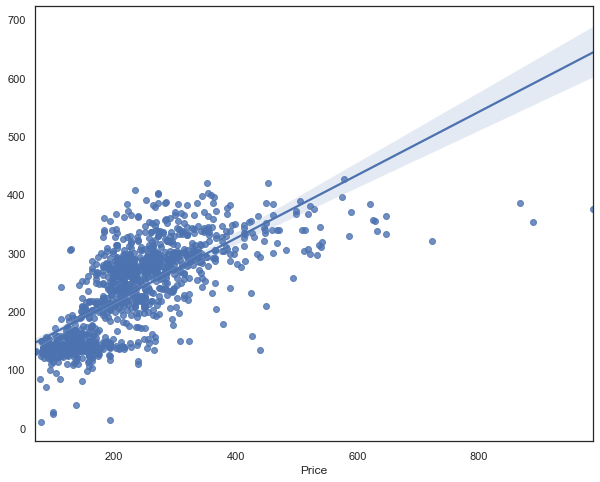

In [127]:
plt.figure(figsize=(10,8))
sns.regplot(y6_test,predictions6)

In [128]:
coeff_parameter6 = pd.DataFrame(model6.coef_,x6.columns,columns=['Coefficient'])
coeff_parameter6

,Coefficient
Day_Weekend,-3.083239
Room Type_Private room,-79.662953
Room Type_Shared room,-182.938548
Person Capacity,100.453416
Cleanliness Rating,47.924586
Guest Satisfaction,42.356752
Bedrooms,203.228888
City Center (km),58.281937
Metro Distance (km),-17.743539
Normalised Attraction Index,-59.396946


In [129]:
# print the intercept
print(model6.intercept_)

84.26380681552337


In [130]:
import statsmodels.api as sm
x6_train_Sm= sm.add_constant(x6_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y6_train,x6_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     394.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:45:17   Log-Likelihood:                -26681.
No. Observations:                4610   AIC:                         5.339e+04
Df Residuals:                    4598   BIC:                         5.346e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Paris

In [131]:
df7 = pd.read_csv('Paris.csv')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           6688 non-null   int64  
 1   City                         6688 non-null   object 
 2   Price                        6688 non-null   float64
 3   Day                          6688 non-null   object 
 4   Room Type                    6688 non-null   object 
 5   Shared Room                  6688 non-null   bool   
 6   Private Room                 6688 non-null   bool   
 7   Person Capacity              6688 non-null   int64  
 8   Superhost                    6688 non-null   bool   
 9   Multiple Rooms               6688 non-null   int64  
 10  Business                     6688 non-null   int64  
 11  Cleanliness Rating           6688 non-null   int64  
 12  Guest Satisfaction           6688 non-null   int64  
 13  Bedrooms          

In [132]:
#Remove unnecessary columns
df7 = df7.drop('ID', axis=1)
df7 = df7.drop('City', axis=1)
df7 = df7.drop('Shared Room', axis=1)
df7 = df7.drop('Private Room', axis=1)
df7 = df7.drop('Multiple Rooms', axis=1)
df7 = df7.drop('Business', axis=1)
df7 = df7.drop('Attraction Index', axis=1)
df7 = df7.drop('Restraunt Index', axis=1)

In [133]:
#Convert to dummy data  
df7 = pd.get_dummies(df7, drop_first=True)
df7.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,296.159940,2,True,10,97,1,0.699821,0.193709,25.239380,71.608028,0,1,0
1,288.237487,2,True,10,97,1,2.100005,0.107221,42.507907,58.791463,0,1,0
2,211.343089,2,False,10,94,1,3.302325,0.234724,21.640840,53.051310,0,1,0
3,298.956100,2,False,9,91,1,0.547567,0.195997,26.391291,70.463506,0,0,0
4,247.926181,4,False,7,82,1,1.197921,0.103573,19.809165,62.918272,0,0,0


In [134]:
# Removed a price data which is above $5000
df7 = df7[df7["Price"]<5000]

In [135]:
#Independent variables
x7 = df7[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y7 = df7['Price']

In [136]:
#Calculation and data conversion
x7['Person Capacity'] = minmax_sc.fit_transform(x7[['Person Capacity']])
x7['Cleanliness Rating'] = minmax_sc.fit_transform(x7[['Cleanliness Rating']])
x7['Guest Satisfaction'] = minmax_sc.fit_transform(x7[['Guest Satisfaction']])
x7['Bedrooms'] = minmax_sc.fit_transform(x7[['Bedrooms']])
x7['City Center (km)'] = minmax_sc.fit_transform(x7[['City Center (km)']])
x7['Metro Distance (km)'] = minmax_sc.fit_transform(x7[['Metro Distance (km)']])
x7['Normalised Attraction Index'] = minmax_sc.fit_transform(x7[['Normalised Attraction Index']])
x7['Normalised Restraunt Index'] = minmax_sc.fit_transform(x7[['Normalised Restraunt Index']])

In [137]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size = 0.2, random_state = 0)

In [138]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model7 = LinearRegression()
model7.fit(x7_train,y7_train)

LinearRegression()

In [139]:
predictions7 = model7.predict(x7_test)
predictions7

array([296.27643758, 194.57890177, 295.51898844, ..., 240.90058987,
       193.75656458, 379.2076291 ])

<AxesSubplot:xlabel='Price'>

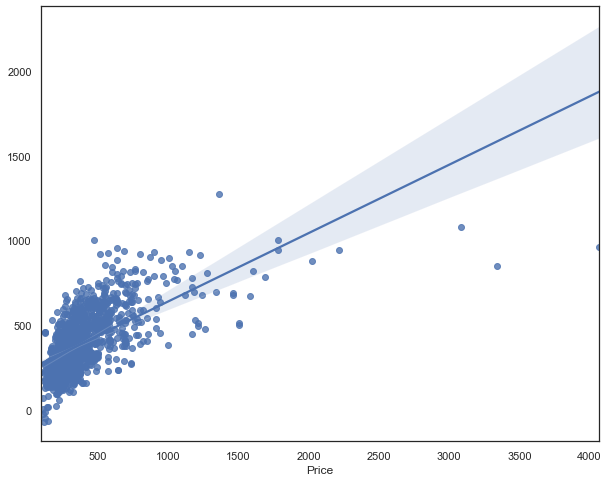

In [140]:
plt.figure(figsize=(10,8))
sns.regplot(y7_test,predictions7)

In [141]:
coeff_parameter7 = pd.DataFrame(model7.coef_,x7.columns,columns=['Coefficient'])
coeff_parameter7

,Coefficient
Day_Weekend,17.865753
Room Type_Private room,-65.168797
Room Type_Shared room,-263.253279
Person Capacity,274.873983
Cleanliness Rating,214.265862
Guest Satisfaction,-37.928690
Bedrooms,593.228250
City Center (km),156.176357
Metro Distance (km),49.318549
Normalised Attraction Index,772.293768


In [142]:
# print the intercept
print(model7.intercept_)

-192.03455347304924


In [143]:
import statsmodels.api as sm
x7_train_Sm= sm.add_constant(x7_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y7_train,x7_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     359.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:54:02   Log-Likelihood:                -35961.
No. Observations:                5349   AIC:                         7.195e+04
Df Residuals:                    5337   BIC:                         7.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Rome

In [144]:
df8 = pd.read_csv('Rome.csv')
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9027 entries, 0 to 9026
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9027 non-null   int64  
 1   City                         9027 non-null   object 
 2   Price                        9027 non-null   float64
 3   Day                          9027 non-null   object 
 4   Room Type                    9027 non-null   object 
 5   Shared Room                  9027 non-null   bool   
 6   Private Room                 9027 non-null   bool   
 7   Person Capacity              9027 non-null   int64  
 8   Superhost                    9027 non-null   bool   
 9   Multiple Rooms               9027 non-null   int64  
 10  Business                     9027 non-null   int64  
 11  Cleanliness Rating           9027 non-null   int64  
 12  Guest Satisfaction           9027 non-null   int64  
 13  Bedrooms          

In [145]:
#Remove unnecessary columns
df8 = df8.drop('ID', axis=1)
df8 = df8.drop('City', axis=1)
df8 = df8.drop('Shared Room', axis=1)
df8 = df8.drop('Private Room', axis=1)
df8 = df8.drop('Multiple Rooms', axis=1)
df8 = df8.drop('Business', axis=1)
df8 = df8.drop('Attraction Index', axis=1)
df8 = df8.drop('Restraunt Index', axis=1)

In [146]:
#Convert to dummy data  
df8 = pd.get_dummies(df8, drop_first=True)
df8.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,156.874664,2,True,10,95,1,2.978468,1.595733,6.230648,15.191486,0,1,0
1,172.772543,2,False,9,80,1,0.935371,0.649269,10.696887,27.249208,0,1,0
2,277.745307,4,False,9,90,1,2.203025,0.494697,15.328408,35.400361,0,0,0
3,444.906834,6,False,9,92,2,2.703010,1.295153,17.852092,44.325522,0,0,0
4,131.391298,3,False,9,91,1,1.295968,0.867455,7.026475,18.215634,0,1,0


In [147]:
# Removed a price data which is above $5000
df8 = df8[df8["Price"]<5000]

In [148]:
#Independent variables
x8 = df8[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y8 = df8['Price']

In [149]:
#Calculation and data conversion
x8['Person Capacity'] = minmax_sc.fit_transform(x8[['Person Capacity']])
x8['Cleanliness Rating'] = minmax_sc.fit_transform(x8[['Cleanliness Rating']])
x8['Guest Satisfaction'] = minmax_sc.fit_transform(x8[['Guest Satisfaction']])
x8['Bedrooms'] = minmax_sc.fit_transform(x8[['Bedrooms']])
x8['City Center (km)'] = minmax_sc.fit_transform(x8[['City Center (km)']])
x8['Metro Distance (km)'] = minmax_sc.fit_transform(x8[['Metro Distance (km)']])
x8['Normalised Attraction Index'] = minmax_sc.fit_transform(x8[['Normalised Attraction Index']])
x8['Normalised Restraunt Index'] = minmax_sc.fit_transform(x8[['Normalised Restraunt Index']])

In [150]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, test_size = 0.2, random_state = 0)

In [151]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model8 = LinearRegression()
model8.fit(x8_train,y8_train)

LinearRegression()

In [152]:
predictions8 = model8.predict(x8_test)
predictions8

array([138.80446059, 132.87902762, 204.00422976, ..., 364.36337497,
       165.96433209, 155.01521217])

<AxesSubplot:xlabel='Price'>

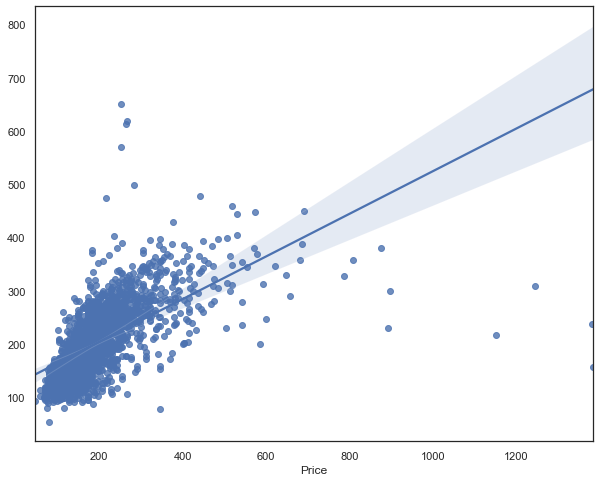

In [153]:
plt.figure(figsize=(10,8))
sns.regplot(y8_test,predictions8)

In [154]:
coeff_parameter8 = pd.DataFrame(model8.coef_,x8.columns,columns=['Coefficient'])
coeff_parameter8

,Coefficient
Day_Weekend,5.657097
Room Type_Private room,-38.111940
Room Type_Shared room,-90.660847
Person Capacity,50.387947
Cleanliness Rating,-12.338500
Guest Satisfaction,52.188179
Bedrooms,227.432418
City Center (km),-13.505327
Metro Distance (km),4.644376
Normalised Attraction Index,424.160392


In [155]:
# print the intercept
print(model8.intercept_)

49.49428898874177


In [156]:
import statsmodels.api as sm
x8_train_Sm= sm.add_constant(x8_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y8_train,x8_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     333.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:01:58   Log-Likelihood:                -43387.
No. Observations:                7221   AIC:                         8.680e+04
Df Residuals:                    7209   BIC:                         8.688e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Vienna

In [157]:
df9 = pd.read_csv('Vienna.csv')
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3537 non-null   int64  
 1   City                         3537 non-null   object 
 2   Price                        3537 non-null   float64
 3   Day                          3537 non-null   object 
 4   Room Type                    3537 non-null   object 
 5   Shared Room                  3537 non-null   bool   
 6   Private Room                 3537 non-null   bool   
 7   Person Capacity              3537 non-null   int64  
 8   Superhost                    3537 non-null   bool   
 9   Multiple Rooms               3537 non-null   int64  
 10  Business                     3537 non-null   int64  
 11  Cleanliness Rating           3537 non-null   int64  
 12  Guest Satisfaction           3537 non-null   int64  
 13  Bedrooms          

In [158]:
#Remove unnecessary columns
df9 = df9.drop('ID', axis=1)
df9 = df9.drop('City', axis=1)
df9 = df9.drop('Shared Room', axis=1)
df9 = df9.drop('Private Room', axis=1)
df9 = df9.drop('Multiple Rooms', axis=1)
df9 = df9.drop('Business', axis=1)
df9 = df9.drop('Attraction Index', axis=1)
df9 = df9.drop('Restraunt Index', axis=1)

In [159]:
#Convert to dummy data  
df9 = pd.get_dummies(df9, drop_first=True)
df9.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,250.566814,3,True,10,99,1,1.732893,0.212627,8.496979,4.424871,0,0,0
1,156.604259,3,False,10,97,1,4.807912,0.228253,5.739643,2.049380,0,0,0
2,283.056354,5,True,10,95,2,2.811773,0.244163,7.250957,3.618473,0,0,0
3,301.755370,4,True,10,94,2,3.240595,0.610430,6.622588,3.104489,0,0,0
4,150.760816,2,True,10,96,1,2.241146,1.119507,8.898738,3.689824,0,0,0


In [160]:
# Removed a price data which is above $5000
df9 = df9[df9["Price"]<5000]

In [161]:
#Independent variables
x9 = df9[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

#Dependent variable
y9 = df9['Price']

In [162]:
#Calculation and data conversion
x9['Person Capacity'] = minmax_sc.fit_transform(x9[['Person Capacity']])
x9['Cleanliness Rating'] = minmax_sc.fit_transform(x9[['Cleanliness Rating']])
x9['Guest Satisfaction'] = minmax_sc.fit_transform(x9[['Guest Satisfaction']])
x9['Bedrooms'] = minmax_sc.fit_transform(x9[['Bedrooms']])
x9['City Center (km)'] = minmax_sc.fit_transform(x9[['City Center (km)']])
x9['Metro Distance (km)'] = minmax_sc.fit_transform(x9[['Metro Distance (km)']])
x9['Normalised Attraction Index'] = minmax_sc.fit_transform(x9[['Normalised Attraction Index']])
x9['Normalised Restraunt Index'] = minmax_sc.fit_transform(x9[['Normalised Restraunt Index']])

In [163]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x9_train, x9_test, y9_train, y9_test = train_test_split(x9, y9, test_size = 0.2, random_state = 0)

In [164]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model9.fit(x9_train,y9_train)

LinearRegression()

In [165]:
predictions9 = model9.predict(x9_test)
predictions9

array([185.37942677, 299.30021988, 216.99289524, 182.69392806,
       241.91309757, 212.36039034, 315.89316313, 316.21394319,
       281.67402839, 233.14420416, 300.1644415 , 216.27499649,
       172.53204642, 270.42375312, 250.94517837, 345.68673965,
       183.56565801,  71.21104324, 284.47712656, 263.39555838,
       240.41736134, 202.88050053, 235.89406103, 394.73152437,
       129.88379842, 242.54511829, 149.55103029,  72.47498112,
       135.68071939, 297.66044883, 171.52364018, 167.49530068,
       247.41673681, 270.18080307, 264.65322413, 238.46571162,
       249.37574429, 178.04627235, 249.94885387, 224.52694194,
       261.72133032, 265.93315521, 139.78058841, 263.70127725,
       211.59403192, 205.84433109, 347.95407926, 279.13120954,
       309.11499453, 287.58494863, 127.47386528, 262.39513388,
       160.22408978, 161.23864293, 267.29069229, 198.96951828,
       252.91744401, 176.83952116, 299.64239054, 152.29893296,
       237.30492865, 209.30859374, 352.85803245, 237.85

<AxesSubplot:xlabel='Price'>

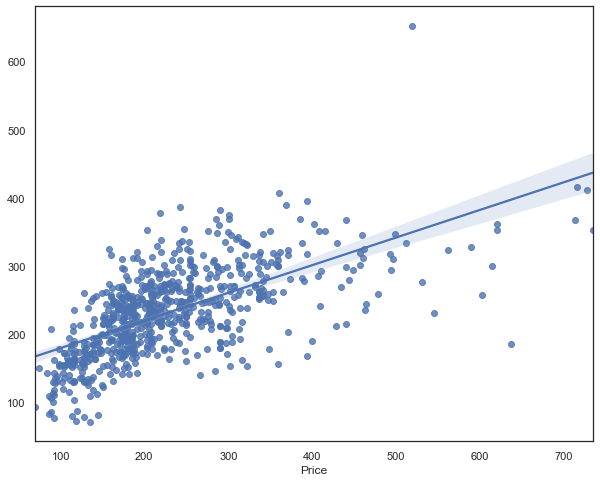

In [166]:
plt.figure(figsize=(10,8))
sns.regplot(y9_test,predictions9)

In [167]:
coeff_parameter9 = pd.DataFrame(model9.coef_,x9.columns,columns=['Coefficient'])
coeff_parameter9

,Coefficient
Day_Weekend,8.374219
Room Type_Private room,-54.304240
Room Type_Shared room,-76.683678
Person Capacity,90.344086
Cleanliness Rating,89.181126
Guest Satisfaction,29.016148
Bedrooms,119.857580
City Center (km),-90.037852
Metro Distance (km),-24.098638
Normalised Attraction Index,262.713758


In [168]:
# print the intercept
print(model9.intercept_)

65.6203168695657


In [169]:
import statsmodels.api as sm
x9_train_Sm= sm.add_constant(x9_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y9_train,x9_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.62e-272
Time:                        16:08:32   Log-Likelihood:                -16477.
No. Observations:                2827   AIC:                         3.298e+04
Df Residuals:                    2815   BIC:                         3.305e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             